# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Living Planet index"
### 1.2 Fragestellung:
- "Wie hat sich der Living Planet Index (LPI) in verschiedenen geografischen Regionen im Verlauf der Jahre verändert und welche regionalen Unterschiede sind dabei erkennbar?"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org



### 1.4 Daten beschaffen und laden

In [ ]:


import pandas as pd


In [63]:
# loading the data
df = pd.read_csv('global-living-planet-index.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','LPI','LPI_upper','LPI_lower']) 
df.head() 



,Gebiet,Code,Jahr,LPI,LPI_upper,LPI_lower
0,Africa,NaN,1970,100.000000,100.00000,100.000000
1,Africa,NaN,1971,94.004613,103.67786,86.478470
2,Africa,NaN,1972,89.996994,105.99841,77.636576
3,Africa,NaN,1973,89.674807,109.67456,74.525344
4,Africa,NaN,1974,85.613140,109.10656,67.872155


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [47]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Living Planet Index')
df_pivot.head()


Jahr,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,,,,,,,,,,,
Africa,100.0,94.004613,89.996994,89.674807,85.613140,79.875220,73.681283,68.556696,63.461990,61.046195,...,30.375797,29.082093,28.170413,26.960373,26.047170,25.596067,25.551108,25.256574,24.632017,23.967030
Asia and Pacific,100.0,103.670140,105.456090,106.375460,107.306080,108.420070,107.959830,106.008470,103.881300,102.263150,...,40.703940,40.625206,42.730197,45.025682,47.193745,45.737422,45.325962,43.191930,41.926342,39.603937
Europe and Central Asia,100.0,101.561760,103.288280,105.340410,107.973430,110.224510,111.411240,111.570610,111.541020,111.605480,...,81.817860,76.981880,71.378440,70.045346,68.172190,66.201930,63.673630,62.696710,63.467930,64.715004
Freshwater,100.0,99.466056,98.527170,97.939116,94.870490,90.887773,86.563830,82.577896,78.732413,75.956740,...,16.353667,15.416210,15.310742,15.783352,16.220301,16.004752,15.896590,15.773053,15.531172,14.783052
Latin America and the Caribbean,100.0,101.007160,99.456760,95.006640,89.129627,82.746035,77.167290,71.914930,68.224823,65.981640,...,8.084096,7.323765,6.918912,6.663473,6.525281,5.976160,5.590089,5.621799,5.709860,5.377315


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [48]:

df.dtypes

Gebiet                                               object
Code                                                 object
Jahr                                                  int64
Living Planet Index                                 float64
Upper confidence interval of Living Planet Index    float64
Lower confidence interval of Living Planet Index    float64
dtype: object

In [49]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  7


In [50]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Africa                             51
Asia and Pacific                   51
Europe and Central Asia            51
Freshwater                         51
Latin America and the Caribbean    51
North America                      51
World                              51
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

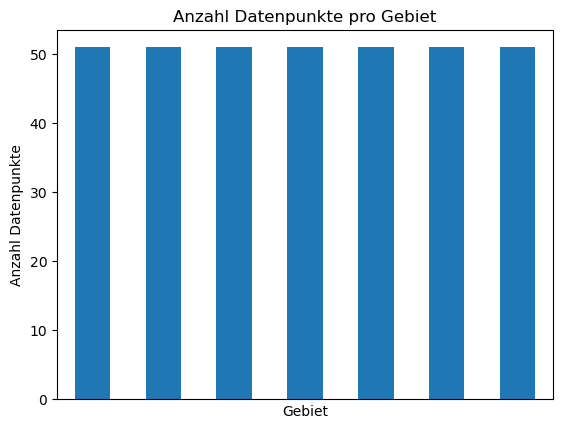

In [51]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

In [52]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  2


In [53]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
OWID_WRL    51
Name: count, dtype: int64

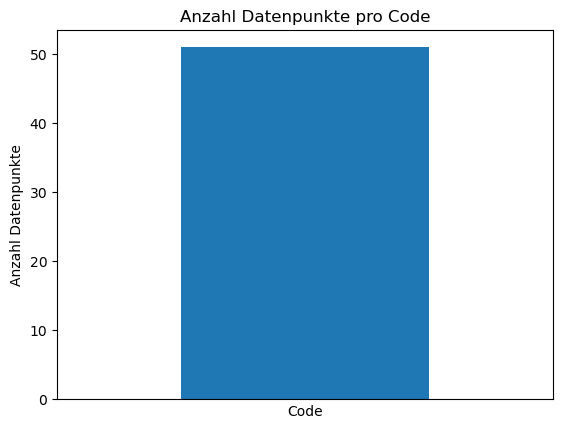

In [54]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [55]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  51


In [56]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1970    7
1971    7
1972    7
1973    7
1974    7
1975    7
1976    7
1977    7
1978    7
1979    7
1980    7
1981    7
1982    7
1983    7
1984    7
1985    7
1986    7
1987    7
1988    7
1989    7
1990    7
1991    7
1992    7
1993    7
1994    7
1995    7
1996    7
1997    7
1998    7
1999    7
2000    7
2001    7
2002    7
2003    7
2004    7
2005    7
2006    7
2007    7
2008    7
2009    7
2010    7
2011    7
2012    7
2013    7
2014    7
2015    7
2016    7
2017    7
2018    7
2019    7
2020    7
Name: count, dtype: int64

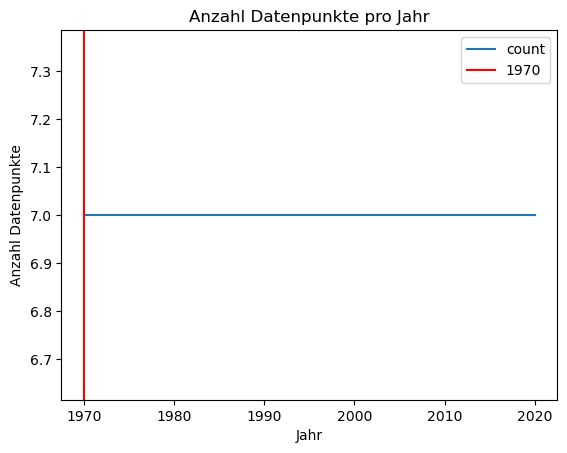

In [57]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1970, color='red',label='1970') # rote Linie bei 1970 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

In [58]:
df.describe()


,Jahr,Living Planet Index,Upper confidence interval of Living Planet Index,Lower confidence interval of Living Planet Index
count,357.000000,357.000000,357.000000,357.000000
mean,1995.000000,62.852547,80.038822,50.874899
std,14.740261,30.835893,32.728130,29.994732
min,1970.000000,5.377315,9.517395,2.832950
25%,1982.000000,37.214458,55.269647,23.687129
50%,1995.000000,63.837220,87.592334,48.693627
75%,2008.000000,89.896840,105.411270,76.082350
max,2020.000000,128.223780,147.943120,110.602660


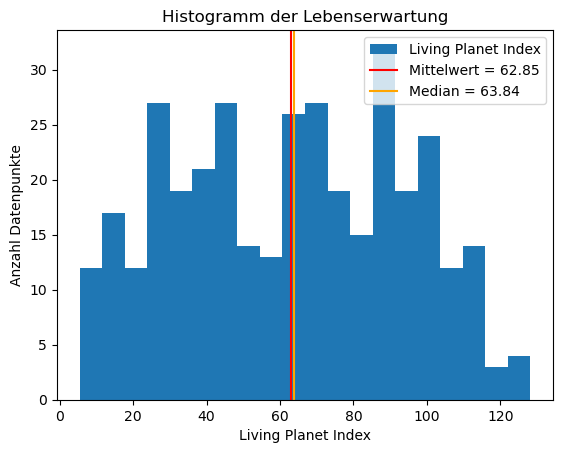

In [59]:
g = df['Living Planet Index'].plot(kind='hist', bins=20, title='Histogramm der Lebenserwartung', 
                           xlabel='Living Planet Index', ylabel='Anzahl Datenpunkte')
mean = df['Living Planet Index'].mean()
g.axvline(x=df['Living Planet Index'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Living Planet Index'].median()
g.axvline(x=df['Living Planet Index'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

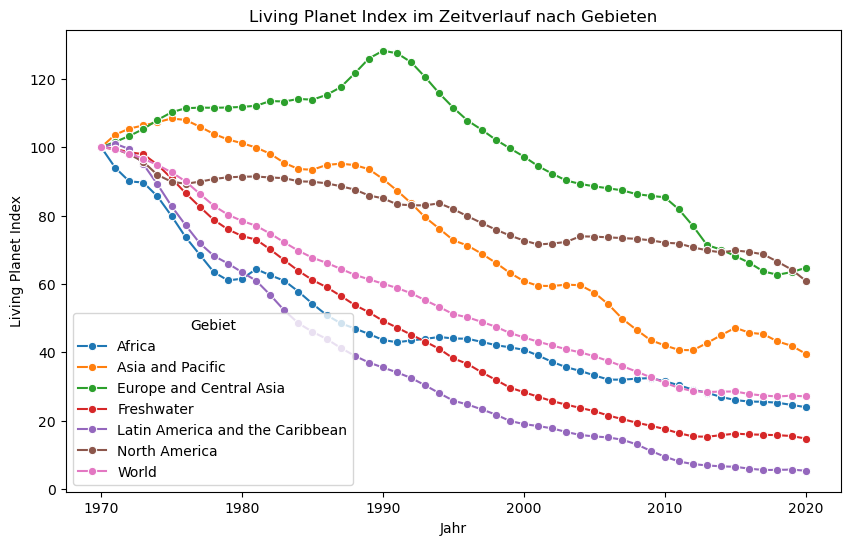

In [65]:
# Visualisierung des LPI im Zeitverlauf für jede Region
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Jahr', y='LPI', hue='Gebiet', marker='o')
plt.title('Living Planet Index im Zeitverlauf nach Gebieten')
plt.xlabel('Jahr')
plt.ylabel('Living Planet Index')
plt.legend(title='Gebiet')
plt.show()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



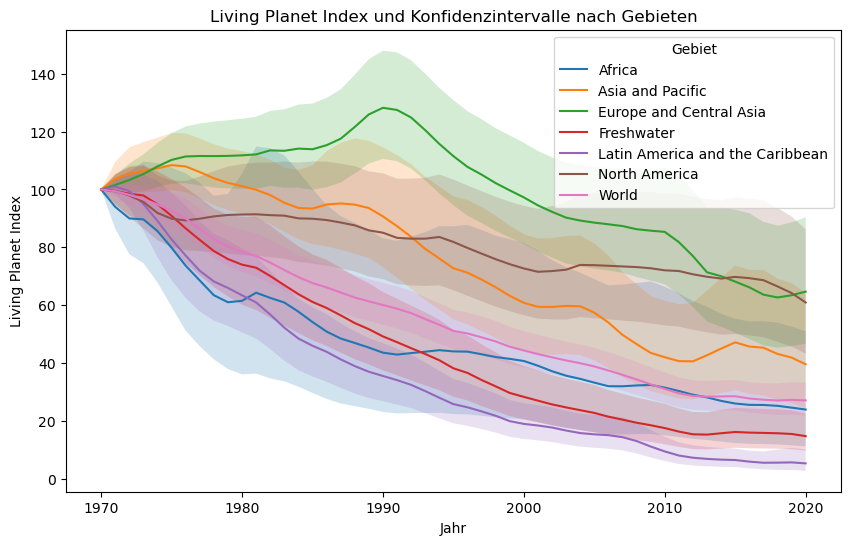

In [64]:
plt.figure(figsize=(10, 6))
for region in df['Gebiet'].unique():
    region_data = df[df['Gebiet'] == region]
    plt.plot(region_data['Jahr'], region_data['LPI'], label=region)
    plt.fill_between(region_data['Jahr'], region_data['LPI_lower'], region_data['LPI_upper'], alpha=0.2)
    
plt.title('Living Planet Index und Konfidenzintervalle nach Gebieten')
plt.xlabel('Jahr')
plt.ylabel('Living Planet Index')
plt.legend(title='Gebiet')
plt.show()

In [67]:
# Berechnung der Korrelation zwischen LPI und Jahr für jede Region
correlations = df.groupby('Gebiet').apply(lambda group: group['LPI'].corr(group['Jahr']))
print('Korrelation zwischen LPI und Jahr für jede Region:')
print(correlations)

Korrelation zwischen LPI und Jahr für jede Region:
Gebiet
Africa                            -0.938519
Asia and Pacific                  -0.975255
Europe and Central Asia           -0.792497
Freshwater                        -0.969844
Latin America and the Caribbean   -0.948097
North America                     -0.974030
World                             -0.984341
dtype: float64


C:\Users\ricca\AppData\Local\Temp\ipykernel_27000\1872267184.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('Gebiet').apply(lambda group: group['LPI'].corr(group['Jahr']))


In [69]:
# Berechnung der prozentualen Veränderung des LPI im Zeitverlauf
df['LPI_change'] = df.groupby('Gebiet')['LPI'].pct_change() * 100

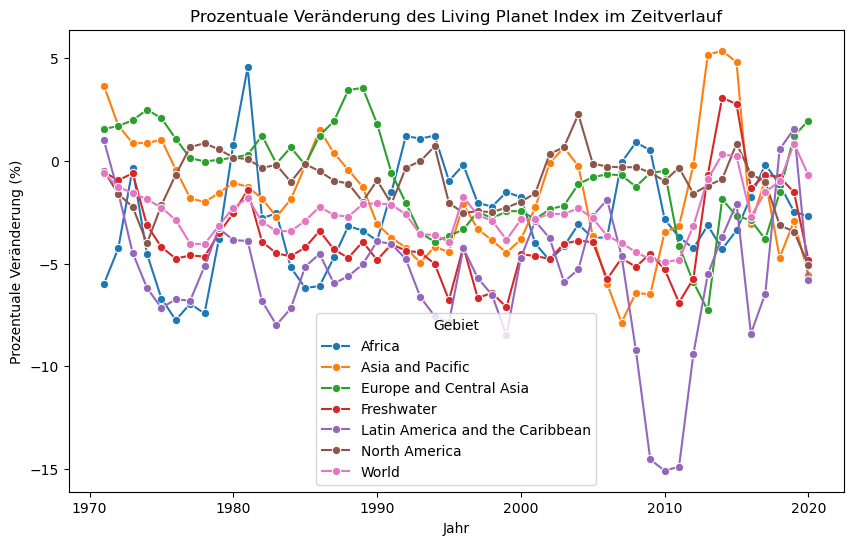

In [70]:
# Visualisierung der prozentualen Veränderung des LPI im Zeitverlauf
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Jahr', y='LPI_change', hue='Gebiet', marker='o')
plt.title('Prozentuale Veränderung des Living Planet Index im Zeitverlauf')
plt.xlabel('Jahr')
plt.ylabel('Prozentuale Veränderung (%)')
plt.legend(title='Gebiet')
plt.show()


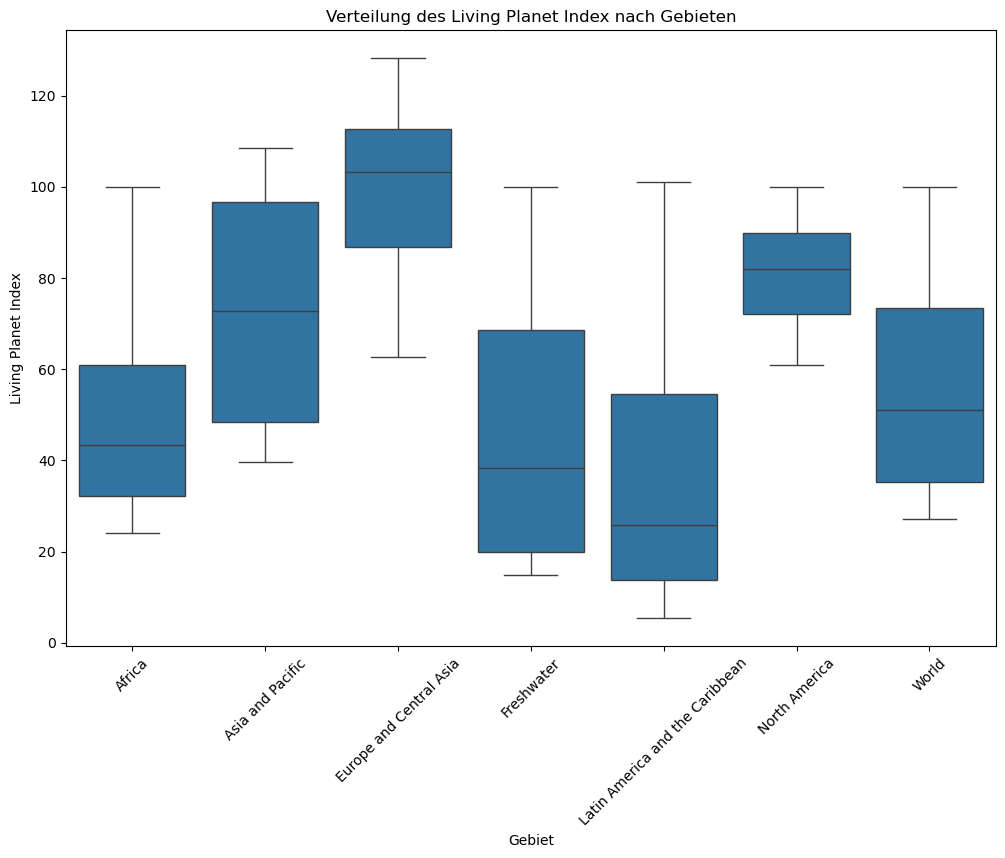

In [72]:
# Boxplot der LPI-Verteilung für jede Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gebiet', y='LPI', data=df)
plt.title('Verteilung des Living Planet Index nach Gebieten')
plt.xlabel('Gebiet')
plt.ylabel('Living Planet Index')
plt.xticks(rotation=45)
plt.show()

Beobachten Sie die Trends und Muster in den Diagrammen:
Steigt oder fällt der LPI in bestimmten Regionen?
Gibt es signifikante Unterschiede zwischen den Regionen oder Jahren?
Wie groß sind die Unsicherheitsbereiche (ci_high, ci_low)?

Erstellen Sie Hypothesen, z. B.:
Regionen mit größerer wirtschaftlicher Entwicklung zeigen eine stabilere LPI-Entwicklung.
Der Rückgang in bestimmten Jahren könnte auf bestimmte Ereignisse (z. B. Umweltkatastrophen) hindeuten.

Hinweise zu möglichen Zusammenhängen:
Analysieren Sie Umweltberichte oder Forschung, um Trends zu erklären.
Nutzen Sie Quellen wie Our World in Data, die zu Ihrem Thema passen.